In [6]:
# table showing our application of in-class materials to our beer dataset
table_of_content = pd.DataFrame([
                                ["Data cleansing & Exploratory Data Analysis (EDA)", "Conducted data cleaning and EDA for our beer dataset"], 
                                ["Machine learning concepts", "Feature scaling; created train, validation and test samples to conduct regression, decision trees, random forest, cross validation; used RMSE for model comparison. Conducted PCA and k-means clustering analysis to identify customers' preferences for beer flavours"],
                                ["NLP pipeline, Topic Modelling, Sentiment Analysis", "Using spacy NLP model to preprocess the data; using spacy matcher to extract key information from the dataset; conducted sentiment analysis on customers' reviews"],
                                ["Neural networks and deep learning","Calculated loss functions, and carry out hyper-parameter tuning for deep learning"]
                                ],
                                columns=["Key concepts","Use of concepts in our analysis"])
pd.set_option('display.max_colwidth', None)
table_of_content

,Key concepts,Use of concepts in our analysis
0,Data cleansing & Exploratory Data Analysis (EDA),Conducted data cleaning and EDA for our beer dataset
1,Machine learning concepts,"Feature scaling; created train, validation and test samples to conduct regression, decision trees, random forest, cross validation; used RMSE for model comparison. Conducted PCA and k-means clustering analysis to identify customers' preferences for beer flavours"
2,"NLP pipeline, Topic Modelling, Sentiment Analysis",Using spacy NLP model to preprocess the data; using spacy matcher to extract key information from the dataset; conducted sentiment analysis on customers' reviews
3,Neural networks and deep learning,"Calculated loss functions, and carry out hyper-parameter tuning for deep learning"


In [43]:
# import libraries

# numerical analytics
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# text preprocessing
import datetime
import re, string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# machine learning 
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [7]:
data = pd.read_csv("/Users/lixingxin/Downloads/beer_data_set.csv")

In [8]:

# inspect data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5556 non-null   object 
 1   key          5558 non-null   int64  
 2   Style        5558 non-null   object 
 3   Style Key    5558 non-null   int64  
 4   Brewery      5558 non-null   object 
 5   Description  5558 non-null   object 
 6   ABV          5558 non-null   float64
 7   Ave Rating   5558 non-null   float64
 8   Min IBU      5558 non-null   int64  
 9   Max IBU      5558 non-null   int64  
 10  Astringency  5558 non-null   int64  
 11  Body         5558 non-null   int64  
 12  Alcohol      5558 non-null   int64  
 13  Bitter       5558 non-null   int64  
 14  Sweet        5558 non-null   int64  
 15  Sour         5558 non-null   int64  
 16  Salty        5558 non-null   int64  
 17  Fruits       5558 non-null   int64  
 18  Hoppy        5558 non-null   int64  
 19  Spices

In [9]:
print(data.shape)
data.head()

(5558, 21)


,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored ""alt"" style beer notably well balanced.\t",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111
1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is also known as “Stickebier” – German slang for “secret brew”. Long Trail Double Bag was originally offered only in our brewery taproom as a special treat to our visitors. With an alcohol content of 7.2%, please indulge in moderation. The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate’s “Beer of the Year” in 2001. Malt Advocate is a national magazine devoted to “expanding the boundaries of fine drinks”. Their panel of judges likes to keep things simple, and therefore of thousands of eligible competitors they award only two categories: “Imported” and “Domestic”. It is a great honor to receive this recognition.33 IBU\t",7.2,3.90,25,50,...,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,253,Altbier,8,Long Trail Brewing Co.,"Notes:Long Trail Ale is a full-bodied amber ale modeled after the “Alt-biers” of Düsseldorf, Germany. Our top fermenting yeast and cold finishing temperature result in a complex, yet clean, full flavor. Originally introduced in November of 1989, Long Trail Ale beer quickly became, and remains, the largest selling craft-brew in Vermont. It is a multiple medal winner at the Great American Beer Festival.25 IBU\t",5.0,3.58,25,50,...,37,6,42,43,11,0,10,54,4,62
3,Doppelsticke,254,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,...,55,31,47,101,18,1,49,40,16,119
4,Scurry,255,Altbier,8,Off Color Brewing,"Notes:Just cause it's dark and German doesn't mean it's an alt. Based on the obscure Kottbusser style of beer, this surprisingly dry beer retains all the aroma and nuance of honey (from bees) and molasses (not from bees) creating a perception of sweetness through cool, controlled fermentation. Because we're sweet enough damn it. 18 IBU\t",5.3,3.67,25,50,...,69,10,63,120,14,0,19,36,15,218


<AxesSubplot:>

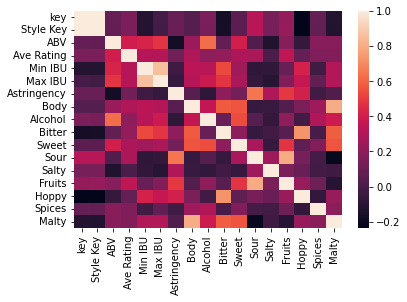

In [10]:
# inspect variables coreleration
sns.heatmap(data.corr())

array([[<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'Style Key'}>,
        <AxesSubplot:title={'center':'ABV'}>,
        <AxesSubplot:title={'center':'Ave Rating'}>],
       [<AxesSubplot:title={'center':'Min IBU'}>,
        <AxesSubplot:title={'center':'Max IBU'}>,
        <AxesSubplot:title={'center':'Astringency'}>,
        <AxesSubplot:title={'center':'Body'}>],
       [<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Bitter'}>,
        <AxesSubplot:title={'center':'Sweet'}>,
        <AxesSubplot:title={'center':'Sour'}>],
       [<AxesSubplot:title={'center':'Salty'}>,
        <AxesSubplot:title={'center':'Fruits'}>,
        <AxesSubplot:title={'center':'Hoppy'}>,
        <AxesSubplot:title={'center':'Spices'}>],
       [<AxesSubplot:title={'center':'Malty'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

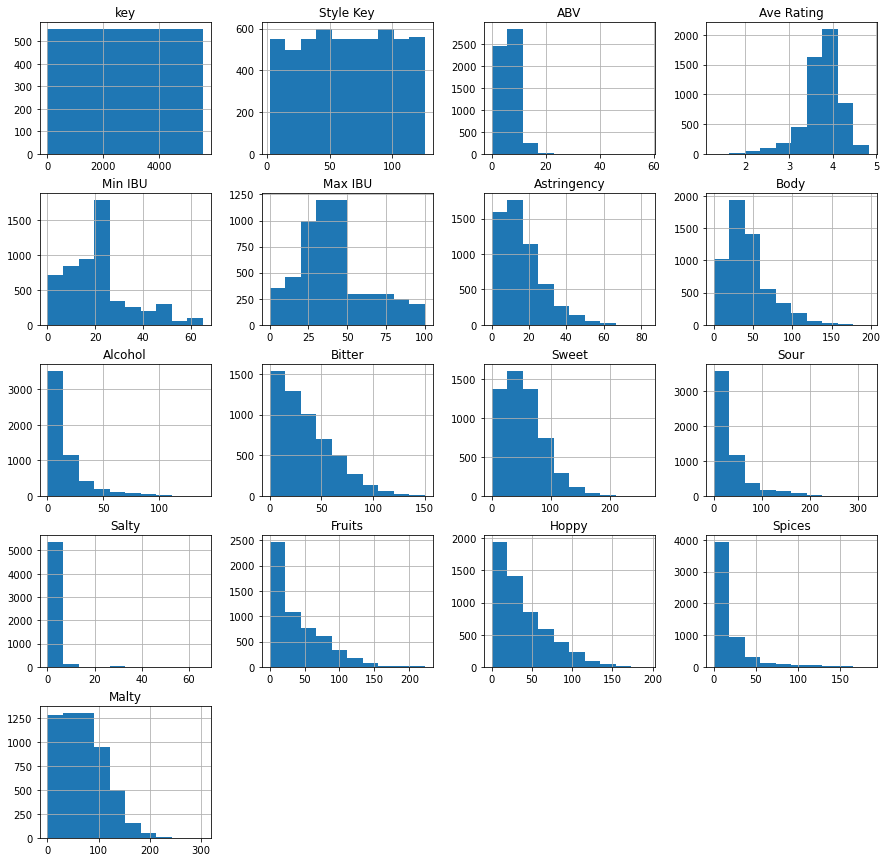

In [11]:
# inspect the distribution of the data
data.hist(figsize=(15,15))

In [12]:
# inspect unique values
print(data.nunique())

Name           5317
key            5558
Style           112
Style Key       112
Brewery        1498
Description    3347
ABV             229
Ave Rating      289
Min IBU          21
Max IBU          25
Astringency      73
Body            165
Alcohol         116
Bitter          141
Sweet           191
Sour            222
Salty            47
Fruits          185
Hoppy           156
Spices          155
Malty           217
dtype: int64


In [13]:
# inspect na values
print(data.isna().any())

Name            True
key            False
Style          False
Style Key      False
Brewery        False
Description    False
ABV            False
Ave Rating     False
Min IBU        False
Max IBU        False
Astringency    False
Body           False
Alcohol        False
Bitter         False
Sweet          False
Sour           False
Salty          False
Fruits         False
Hoppy          False
Spices         False
Malty          False
dtype: bool


In [14]:
# inspect Brewery column
print(data['Brewery'].nunique()) #total number of brewers
data['Brewery'].unique() #name of the brewers

1498


array(['Alaskan Brewing Co.', 'Long Trail Brewing Co.',
       'Uerige Obergärige Hausbrauerei', ..., 'Russell Brewing Company',
       'Aslin Beer Company', 'Stony Creek Brewery'], dtype=object)

In [15]:
# there are some rows that contain 'error entering this description' in their description
data.loc[data['Description'] == 'error entering this description', :]

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
3166,Alpha King,2004,Pale Ale - American,48,3 Floyds Brewing Co.,error entering this description,6.66,4.26,25,50,...,25,6,45,37,41,1,46,78,6,55
5551,Winter Ale,694,Winter Warmer,17,Fremont Brewing Company,error entering this description,8.00,3.87,35,50,...,80,26,56,79,19,0,27,44,26,122


In [16]:
# create dataframe to store name and key
name_key = data[["Name", "key"]].drop_duplicates().reset_index(drop=True)
# create dataframe to store style and key
style_key = data[["Style", "Style Key"]].drop_duplicates().reset_index(drop=True)
# create keys for brewery
brewery_key = pd.factorize(data['Brewery'], sort=True)[0]
data.insert(2, 'Brewery Key', brewery_key)
# create dataframe to store style and key
brewery_key = data[["Brewery", "Brewery Key"]].drop_duplicates().reset_index(drop=True)
# drop columns: Name, Style
df_beer = data.drop(['Name', 'Style', 'Brewery'], axis = 1)
df_beer.head(10)

,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,251,34,8,"Notes:Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored ""alt"" style beer notably well balanced.\t",5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,252,872,8,"Notes:This malty, full-bodied double alt is also known as “Stickebier” – German slang for “secret brew”. Long Trail Double Bag was originally offered only in our brewery taproom as a special treat to our visitors. With an alcohol content of 7.2%, please indulge in moderation. The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate’s “Beer of the Year” in 2001. Malt Advocate is a national magazine devoted to “expanding the boundaries of fine drinks”. Their panel of judges likes to keep things simple, and therefore of thousands of eligible competitors they award only two categories: “Imported” and “Domestic”. It is a great honor to receive this recognition.33 IBU\t",7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,253,872,8,"Notes:Long Trail Ale is a full-bodied amber ale modeled after the “Alt-biers” of Düsseldorf, Germany. Our top fermenting yeast and cold finishing temperature result in a complex, yet clean, full flavor. Originally introduced in November of 1989, Long Trail Ale beer quickly became, and remains, the largest selling craft-brew in Vermont. It is a multiple medal winner at the Great American Beer Festival.25 IBU\t",5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
3,254,1402,8,Notes:,8.5,4.15,25,50,13,55,31,47,101,18,1,49,40,16,119
4,255,1019,8,"Notes:Just cause it's dark and German doesn't mean it's an alt. Based on the obscure Kottbusser style of beer, this surprisingly dry beer retains all the aroma and nuance of honey (from bees) and molasses (not from bees) creating a perception of sweetness through cool, controlled fermentation. Because we're sweet enough damn it. 18 IBU\t",5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218
5,256,997,8,"Notes:Called 'Dark Double Alt' on the label.Seize the season with Sleigh'r. Layers of deeply toasted malt are balanced by just enough hop bitterness to make it deceivingly drinkable. Paired with a dry finish, Sleigh’r is anything but your typical winter brew.An Alt ferments with Ale yeast at colder lagering temperatures. This effect gives Alts a more refined, crisp lager-like flavor than traditional ales. The Alt has been “Ninkasified” raising the ABV and IBUs. Sleigh'r has a deep, toasted malt flavor that finishes dry and balanced.50 IBU\t",7.2,3.78,25,50,25,51,26,44,45,9,1,11,51,20,95
6,257,1402,8,Notes:,6.0,4.10,25,50,22,45,13,46,62,25,1,34,60,4,103
7,258,1464,8,Notes:Classified as a German Altbier by the Widmer Brothers; brewed with an (ale) Alt yeast strain.availability: early Aug. - late Oct.bitterness : 28 IBUoriginal gravity: 13.5° PLATO\t,5.3,3.46,25,50,28,40,3,40,58,29,0,36,54,8,97
8,259,1237,8,Notes:,5.0,3.60,25,50,18,49,5,37,73,22,0,21,37,4,98
9,260,1336,8,"Notes:OMB’s flagship, Copper, is an authentic Düsseldorf style “Altbier” or Amber Ale. There are no crazy flavors or gimmicks with Copper – its full-flavored start transitions to a smooth, balanced, easy-drinking finish. It’s the beer that tastes like beer.\t",4.8,4.10,25,50,25,35,4,38,39,13,1,8,60,16,97


In [17]:
# remove rows that contain only 'Notes:' in description - they are NA values

# 1. remove the 'Notes' in the description - so that rows that contain only 'Notes:' in description will become empty
df_beer['Description'] = df_beer['Description'].str.replace(r'Notes:', "", regex = True)
print(df_beer.shape)

# 2. create a new dataframe with rows that contain description with length greater than 0 (rows that have no empty description)
df_beer1 = df_beer[df_beer['Description'].str.split().str.len().gt(0)]
print(df_beer1.shape)

# When inspecting the dataset, there are some rows that contain description of 'error entering this description', these rows need to be removed as well
df_beer1.drop(df_beer1[df_beer1['Description'] == 'error entering this description'].index, axis=0, inplace = True)

#check the shape of the new df if we have removed the empty description rows
print(df_beer1.shape)
df_beer1.head(10)

(5558, 19)
(3362, 19)
(3360, 19)


/Users/lixingxin/miniforge3/envs/tf2x/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,251,34,8,"Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored ""alt"" style beer notably well balanced.\t",5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,252,872,8,"This malty, full-bodied double alt is also known as “Stickebier” – German slang for “secret brew”. Long Trail Double Bag was originally offered only in our brewery taproom as a special treat to our visitors. With an alcohol content of 7.2%, please indulge in moderation. The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate’s “Beer of the Year” in 2001. Malt Advocate is a national magazine devoted to “expanding the boundaries of fine drinks”. Their panel of judges likes to keep things simple, and therefore of thousands of eligible competitors they award only two categories: “Imported” and “Domestic”. It is a great honor to receive this recognition.33 IBU\t",7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,253,872,8,"Long Trail Ale is a full-bodied amber ale modeled after the “Alt-biers” of Düsseldorf, Germany. Our top fermenting yeast and cold finishing temperature result in a complex, yet clean, full flavor. Originally introduced in November of 1989, Long Trail Ale beer quickly became, and remains, the largest selling craft-brew in Vermont. It is a multiple medal winner at the Great American Beer Festival.25 IBU\t",5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
4,255,1019,8,"Just cause it's dark and German doesn't mean it's an alt. Based on the obscure Kottbusser style of beer, this surprisingly dry beer retains all the aroma and nuance of honey (from bees) and molasses (not from bees) creating a perception of sweetness through cool, controlled fermentation. Because we're sweet enough damn it. 18 IBU\t",5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218
5,256,997,8,"Called 'Dark Double Alt' on the label.Seize the season with Sleigh'r. Layers of deeply toasted malt are balanced by just enough hop bitterness to make it deceivingly drinkable. Paired with a dry finish, Sleigh’r is anything but your typical winter brew.An Alt ferments with Ale yeast at colder lagering temperatures. This effect gives Alts a more refined, crisp lager-like flavor than traditional ales. The Alt has been “Ninkasified” raising the ABV and IBUs. Sleigh'r has a deep, toasted malt flavor that finishes dry and balanced.50 IBU\t",7.2,3.78,25,50,25,51,26,44,45,9,1,11,51,20,95
7,258,1464,8,Classified as a German Altbier by the Widmer Brothers; brewed with an (ale) Alt yeast strain.availability: early Aug. - late Oct.bitterness : 28 IBUoriginal gravity: 13.5° PLATO\t,5.3,3.46,25,50,28,40,3,40,58,29,0,36,54,8,97
9,260,1336,8,"OMB’s flagship, Copper, is an authentic Düsseldorf style “Altbier” or Amber Ale. There are no crazy flavors or gimmicks with Copper – its full-flavored start transitions to a smooth, balanced, easy-drinking finish. It’s the beer that tastes like beer.\t",4.8,4.10,25,50,25,35,4,38,39,13,1,8,60,16,97
11,262,1402,8,"Uerige Alt is the most bittered beer in Germany. In spite of this (or just for that reason), this legendary Altbier from Düsseldorf is so full-bodied, aromatic and wholesome.Our top-fermented specialty has been brewed since 1862 from barley malt, caramel malt, roasted malt, hops, water - and with our very special Uerige yeast.Our Uerige Alt is regularly chosen among the ten best beers in Germany. It has an alcohol content of 4.7% and a minimum fresh date of eight weeks.Unser Uerige Alt wird regelmäßig unter die zehn besten Biere Deutschlands gewählt. Es hat einen Alkoholgehalt von 4,7% und ein Mindestfrischedatum von acht Wochen.\t",4.7,4.00,25,50,34,48,9,55,59,25,1,32,68,12,121
12,263,1481,8,"Check out a piece of Nashville brewing history! Gerst Brewery was the original Nashville brewery, but never recovered after prohibition. We are excited to partner w

In [18]:
# define a function for text cleaning 
def preprocess(text):

    # Remove special characters 
    text = re.sub(r'\W', ' ', text)

    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # remove space 
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 

    # remove all numbers
    text = re.sub(r'\d+','', text) 

    # remove \t
    text = re.sub(r'\t','', text) 

    # substitute multiple white spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Remove prefixed 'b'
    text = re.sub(r'^b\s+', '', text)

    # Remove punctations 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub('', text)

    return text

In [19]:
#apply text preprocess function
df_beer1['Description'] = df_beer1['Description'].apply(lambda x: preprocess(x))
df_beer1

/var/folders/2j/228qzqtj67700fsx62zzmnt80000gn/T/ipykernel_50757/1623173113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beer1['Description'] = df_beer1['Description'].apply(lambda x: preprocess(x))


,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,251,34,8,Richly malty and long on the palate with just enough hop backing to make this beautiful amber colored alt style beer notably well balanced,5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,252,872,8,This malty full bodied double alt is also known as Stickebier German slang for secret brew Long Trail Double Bag was originally offered only in our brewery taproom as special treat to our visitors With an alcohol content of please indulge in moderation The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate Beer of the Year in Malt Advocate is national magazine devoted to expanding the boundaries of fine drinks Their panel of judges likes to keep things simple and therefore of thousands of eligible competitors they award only two categories Imported and Domestic It is great honor to receive this recognition IBU,7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,253,872,8,Long Trail Ale is full bodied amber ale modeled after the Alt biers of Düsseldorf Germany Our top fermenting yeast and cold finishing temperature result in complex yet clean full flavor Originally introduced in November of Long Trail Ale beer quickly became and remains the largest selling craft brew in Vermont It is multiple medal winner at the Great American Beer Festival IBU,5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
4,255,1019,8,Just cause it dark and German doesn mean it an alt Based on the obscure Kottbusser style of beer this surprisingly dry beer retains all the aroma and nuance of honey from bees and molasses not from bees creating perception of sweetness through cool controlled fermentation Because we re sweet enough damn it IBU,5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218
5,256,997,8,Called Dark Double Alt on the label Seize the season with Sleigh Layers of deeply toasted malt are balanced by just enough hop bitterness to make it deceivingly drinkable Paired with dry finish Sleigh is anything but your typical winter brew An Alt ferments with Ale yeast at colder lagering temperatures This effect gives Alts more refined crisp lager like flavor than traditional ales The Alt has been Ninkasified raising the ABV and IBUs Sleigh has deep toasted malt flavor that finishes dry and balanced IBU,7.2,3.78,25,50,25,51,26,44,45,9,1,11,51,20,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5549,692,755,17,A new season means new adventures We created Stir Crazy Porter to warm you from within during the coldest time of year Bundle up and enjoy Our sturdy porter is brewed with layers of malty goodness giving it adark brown hue and satisfying notes of roasted malt chocolate and caramel,6.5,3.86,35,50,9,72,26,48,104,27,1,43,29,27,96
5552,695,1118,17,This hearty American pale ale contains rich blend of spices that warms the soul on cold winter night Chill the mug stoke the fire and savor this quality seasonal brew Available only during the Winter season,6.0,3.63,35,50,15,31,23,16,54,43,0,54,14,140,58
5554,697,55,17,This is the forty fifth annual Our Special Ale from the brewers at Anchor This ale made with natural flavors is sold only from early November to mid January Its recipe and hand drawn tree change every year but the intent with which we offer it remains the same joy and celebration of the newness of life Since ancient times trees have symbolized the winter solstice when the earth with its seasons appears born anew This year tree is western arborvitae tree of life an evergreen conifer native to Northern California,6.9,3.79,35,50,22,73,9,58,87,23,0,48,91,44,104
5556,699,1210,17,Chanukah Beer pours rich crystal clear chestnut to ruby color with light creamy head The aroma and flavors lean toward robust winter warmer though brewed without any spices Just all malt and hop goodness Light caramel and toasty nuttiness as well as hint of sweeter chocolate are roun

In [20]:
# create the vocab list from excel file
Mouthfeel = pd.read_excel('/Users/lixingxin/Downloads/archive/Beer Descriptors Simplified.xlsx',sheet_name='Mouthfeel')
Taste = pd.read_excel('/Users/lixingxin/Downloads/archive/Beer Descriptors Simplified.xlsx',sheet_name='Taste')
Flavor = pd.read_excel('/Users/lixingxin/Downloads/archive/Beer Descriptors Simplified.xlsx',sheet_name='Flavor And Aroma')

In [21]:
# Drop all impact columns
Mouthfeel = Mouthfeel.drop(['Impact','Impact.1','Impact.2'], axis = 1)
Taste = Taste.drop(['Impact','Impact.1','Impact.2','Impact.3'], axis = 1)
Flavor = Flavor.drop(['Impact','Impact.1','Impact.2','Impact.3'], axis = 1)

In [22]:
# combine three data frames into one
df_descriptors = pd.concat([Mouthfeel,Taste,Flavor], axis = 1)
df_descriptors

,Astringent,Body,Alcoholic,Bitter,Sweet,Sour,Salty,Fruity,Hoppy,Spices,Malty
0,acetic,acacia,absinthe,ahtanum,acacia,acetic,caviar,berries,ahtanum,absinthe,amaranth
1,acid,acasia,agave,amarillo,acasia,acid,cracker,berry,amarillo,allspice,azrael
2,acidic,amaranth,alcohol,anjilanaka,apple,acidic,crackers,blabaer,apollo,anise,barley
3,acidified,amargor,alcoholic,apollo,apples,acidified,crackery,blackberries,azacca,aniseed,barleymalt
4,acidifying,big,alcoholized,ashtray,apricot,acidifying,salt,blackberry,bitter,annatto,barleys
...,...,...,...,...,...,...,...,...,...,...,...
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oreos
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,seedy
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toffe
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tofee


In [23]:
# match vocab list to the description by spacy matcher
import spacy
nlp = spacy.load('en_core_web_sm')

In [24]:
# Import the PhraseMatcher library
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

In [25]:
# extract words as a list from the df_descriptors
def extract_word_list(df,column):
    word_list = []
    word_list = df[column].tolist()
    word_list= [x for x in word_list if str(x) != 'nan']
    return word_list

In [26]:
Astringent = extract_word_list(df_descriptors,'Astringent')
Body = extract_word_list(df_descriptors,'Body')
Alcoholic = extract_word_list(df_descriptors,'Alcoholic')
Bitter = extract_word_list(df_descriptors,'Bitter')
Sweet = extract_word_list(df_descriptors,'Sweet')
Sour = extract_word_list(df_descriptors,'Sour')
Salty = extract_word_list(df_descriptors,'Salty')
Fruity = extract_word_list(df_descriptors,'Fruity')
Hoppy = extract_word_list(df_descriptors,'Hoppy')
Spices = extract_word_list(df_descriptors,'Spices')
Malty = extract_word_list(df_descriptors,'Malty')

In [27]:
# convert each phrase to phrase pattern
Astringent_pattern = [nlp(x) for x in Astringent]
Body_pattern = [nlp(x) for x in Body]
Alcoholic_pattern = [nlp(x) for x in Alcoholic]
Bitter_pattern = [nlp(x) for x in Bitter]
Sweet_pattern = [nlp(x) for x in Sweet]
Sour_pattern = [nlp(x) for x in Sour]
Salty_pattern = [nlp(x) for x in Salty]
Fruity_pattern = [nlp(x) for x in Fruity]
Hoppy_pattern = [nlp(x) for x in Hoppy]
Spices_pattern = [nlp(x) for x in Spices]
Malty_pattern = [nlp(x) for x in Malty]

In [28]:
# get description from the df_beer1 to create a Doc object
description = df_beer1['Description']

In [29]:
# match the description with each pattern and create a new dataframe with matched patterns
Astringent_brand = []
Body_brand = []
Alcoholic_brand = []
Bitter_brand = []
Sweet_brand = []
Sour_brand = []
Salty_brand = []
Fruity_brand = []
Hoppy_brand = []
Spices_brand = []
Malty_brand = []

for text in description:
    temp = nlp(text)
    matcher.add('Astringent', None, *Astringent_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Astringent_brand.append(1)
    else: Astringent_brand.append(0)
    
    matcher.remove('Astringent')
    matcher.add('Body', None, *Body_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Body_brand.append(1)
    else: Body_brand.append(0)

    matcher.remove('Body')
    matcher.add('Alcoholic', None, *Alcoholic_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Alcoholic_brand.append(1)
    else: Alcoholic_brand.append(0)

    matcher.remove('Alcoholic')
    matcher.add('Bitter', None, *Bitter_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Bitter_brand.append(1)
    else: Bitter_brand.append(0)

    matcher.remove('Bitter')
    matcher.add('Sweet', None, *Sweet_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Sweet_brand.append(1)
    else: Sweet_brand.append(0)

    matcher.remove('Sweet')
    matcher.add('Sour', None, *Sour_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Sour_brand.append(1)
    else: Sour_brand.append(0)

    matcher.remove('Sour')
    matcher.add('Salty', None, *Salty_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Salty_brand.append(1)
    else: Salty_brand.append(0)

    matcher.remove('Salty')
    matcher.add('Fruity', None, *Fruity_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Fruity_brand.append(1)
    else: Fruity_brand.append(0)

    matcher.remove('Fruity')
    matcher.add('Hoppy', None, *Hoppy_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Hoppy_brand.append(1)
    else: Hoppy_brand.append(0)

    matcher.remove('Hoppy')
    matcher.add('Spices', None, *Spices_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Spices_brand.append(1)
    else: Spices_brand.append(0)

    matcher.remove('Spices')
    matcher.add('Malty', None, *Malty_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Malty_brand.append(1)
    else: Malty_brand.append(0)    

    matcher.remove('Malty')

In [30]:
# create a dataframe with matched patterns
df_brand = pd.DataFrame({'Astringent':Astringent_brand,
                            'Body':Body_brand,
                            'Alcoholic':Alcoholic_brand,
                            'Bitter':Bitter_brand,
                            'Sweet':Sweet_brand,
                            'Sour':Sour_brand,
                            'Salty':Salty_brand,
                            'Fruity':Fruity_brand,
                            'Hoppy':Hoppy_brand,
                            'Spices':Spices_brand,
                            'Malty':Malty_brand})

In [31]:
df_brand

,Astringent,Body,Alcoholic,Bitter,Sweet,Sour,Salty,Fruity,Hoppy,Spices,Malty
0,0,0,0,1,0,0,0,0,1,0,1
1,0,1,1,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0,0
3,1,0,1,1,1,1,0,0,0,0,1
4,1,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3355,0,1,1,0,1,0,0,0,0,0,1
3356,0,0,1,0,0,0,0,0,0,1,1
3357,0,0,0,0,0,0,0,0,1,0,0
3358,0,1,1,1,1,0,0,0,1,1,1


In [32]:
# rename the columns
df_brand.columns = ['Astringency','Body','Alcohol','Bitter','Sweet','Sour','Salty','Fruits','Hoppy','Spices','Malty']

In [33]:
df_beer1 = df_beer1.reset_index(drop=True)

In [34]:
# merge dataframe with df_beer1 and add prefix 'description_' to each column
df_clean = pd.merge(df_beer1,df_brand,left_index=True,right_index=True,how='left',suffixes=('_customer','_description'))
df_clean

,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency_customer,Body_customer,...,Body_description,Alcohol_description,Bitter_description,Sweet_description,Sour_description,Salty_description,Fruits_description,Hoppy_description,Spices_description,Malty_description
0,251,34,8,Richly malty and long on the palate with just enough hop backing to make this beautiful amber colored alt style beer notably well balanced,5.3,3.65,25,50,13,32,...,0,0,1,0,0,0,0,1,0,1
1,252,872,8,This malty full bodied double alt is also known as Stickebier German slang for secret brew Long Trail Double Bag was originally offered only in our brewery taproom as special treat to our visitors With an alcohol content of please indulge in moderation The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate Beer of the Year in Malt Advocate is national magazine devoted to expanding the boundaries of fine drinks Their panel of judges likes to keep things simple and therefore of thousands of eligible competitors they award only two categories Imported and Domestic It is great honor to receive this recognition IBU,7.2,3.90,25,50,12,57,...,1,1,0,0,0,0,0,0,0,1
2,253,872,8,Long Trail Ale is full bodied amber ale modeled after the Alt biers of Düsseldorf Germany Our top fermenting yeast and cold finishing temperature result in complex yet clean full flavor Originally introduced in November of Long Trail Ale beer quickly became and remains the largest selling craft brew in Vermont It is multiple medal winner at the Great American Beer Festival IBU,5.0,3.58,25,50,14,37,...,1,0,0,0,0,0,0,0,0,0
3,255,1019,8,Just cause it dark and German doesn mean it an alt Based on the obscure Kottbusser style of beer this surprisingly dry beer retains all the aroma and nuance of honey from bees and molasses not from bees creating perception of sweetness through cool controlled fermentation Because we re sweet enough damn it IBU,5.3,3.67,25,50,21,69,...,0,1,1,1,1,0,0,0,0,1
4,256,997,8,Called Dark Double Alt on the label Seize the season with Sleigh Layers of deeply toasted malt are balanced by just enough hop bitterness to make it deceivingly drinkable Paired with dry finish Sleigh is anything but your typical winter brew An Alt ferments with Ale yeast at colder lagering temperatures This effect gives Alts more refined crisp lager like flavor than traditional ales The Alt has been Ninkasified raising the ABV and IBUs Sleigh has deep toasted malt flavor that finishes dry and balanced IBU,7.2,3.78,25,50,25,51,...,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,692,755,17,A new season means new adventures We created Stir Crazy Porter to warm you from within during the coldest time of year Bundle up and enjoy Our sturdy porter is brewed with layers of malty goodness giving it adark brown hue and satisfying notes of roasted malt chocolate and caramel,6.5,3.86,35,50,9,72,...,1,1,0,1,0,0,0,0,0,1
3356,695,1118,17,This hearty American pale ale contains rich blend of spices that warms the soul on cold winter night Chill the mug stoke the fire and savor this quality seasonal brew Available only during the Winter season,6.0,3.63,35,50,15,31,...,0,1,0,0,0,0,0,0,1,1
3357,697,55,17,This is the forty fifth annual Our Special Ale from the brewers at Anchor This ale made with natural flavors is sold only from early November to mid January Its recipe and hand drawn tree change every year but the intent with which we offer it remains the same joy and celebration of the newness of life Since ancient times trees have symbolized the winter solstice when the earth with its seasons appears born anew This year tree is western arborvitae tree of life an evergreen conifer native to Northern California,6.9,3.79,35,50,22,73,...,0,0,0,0,0,0,0,1,0,0
3358,699,1210,17,Chanukah Beer pours rich crystal clear chestnut to ruby color with light creamy head The aroma and flavors lean toward robust winter warmer thoug

In [35]:
# export to a csv file
df_clean.to_csv('df_clean.csv')

In [39]:
# split the data with split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
train_data, test_data = train_test_split(df_clean, test_size=0.1, random_state=42)
print(train_set.shape)
print(test_set.shape)

(3024, 30)
(336, 30)


In [41]:
# Finalize training set
df_train = train_data.drop([
    'key',
    'Brewery Key',
    'Description',
    'Min IBU',
    'Max IBU'
    ], axis=1)

# Finalize test set
df_test = test_data.drop([
        'key',
    'Brewery Key',
    'Description',
    'Min IBU',
    'Max IBU'
    ], axis=1)

# Peak at finalized training set
df_train.head()

,Style Key,ABV,Ave Rating,Astringency_customer,Body_customer,Alcohol_customer,Bitter_customer,Sweet_customer,Sour_customer,Salty_customer,...,Body_description,Alcohol_description,Bitter_description,Sweet_description,Sour_description,Salty_description,Fruits_description,Hoppy_description,Spices_description,Malty_description
2233,100,12.00,4.05,6,48,65,24,110,34,0,...,0,0,0,1,1,0,1,0,0,0
1397,61,5.30,3.92,19,47,8,27,66,41,0,...,0,0,0,0,0,0,0,0,0,0
1641,119,8.10,4.35,49,33,16,2,44,197,0,...,0,0,0,0,0,0,1,0,0,0
2319,101,8.50,4.01,17,69,17,91,109,65,2,...,0,0,0,0,0,0,0,0,0,0
3306,126,7.33,4.15,30,18,12,10,96,125,0,...,0,0,0,1,1,0,1,1,0,1


In [44]:
# Features related to tasting profile
tasting_profile_feat = ['Astringency_customer', 'Body_customer', 'Alcohol_customer', 'Bitter_customer', 'Sweet_customer', 
                        'Sour_customer', 'Salty_customer', 'Fruits_customer', 'Hoppy_customer', 'Spices_customer', 'Malty_customer']


# Scale feature values accross each row
def scale_profile_feat(df, tasting_profile_cols):
    scaler = MinMaxScaler()
    scaled_profile_feat = pd.DataFrame(scaler.fit_transform(df[tasting_profile_cols].T).T, columns=tasting_profile_cols)
    scaled_profile_feat.index = df.index
    df = df.drop(tasting_profile_cols, axis=1)
    df = pd.concat([df, scaled_profile_feat], axis=1)
    return df

df_train = scale_profile_feat(df_train, tasting_profile_feat)
df_test = scale_profile_feat(df_test, tasting_profile_feat)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from xgboost import XGBRegressor

import tensorflow as tf
print("Tensorflow version " + tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

#import keras_tuner as kt

Tensorflow version 2.6.2


In [52]:
# Use ordinal encoder to quickly encode categorical features
def label_encode(X_train, X_test=None):
    if X_test is None:
        # Make copy to avoid changing original data
        X_train = X_train.copy()
        # Ordinal encoding for categorical columns
        encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=X_train.select_dtypes(["object"]).nunique()[0])
        for colname in X_train.select_dtypes(["object"]):
            X_train[[colname]] = encoder.fit_transform(X_train[[colname]])
            X_train[[colname]] = X_train[[colname]].astype('int64')
        return X_train

    else:
        # Make copy to avoid changing original data
        X_train = X_train.copy()
        X_test = X_test.copy()
        # Ordinal encoding for categorical columns
        encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=X_train.select_dtypes(["object"]).nunique()[0])
        for colname in X_train.select_dtypes(["object"]):
            X_train[[colname]] = encoder.fit_transform(X_train[[colname]])
            X_train[[colname]] = X_train[[colname]].astype('int64')
            X_test[[colname]] = encoder.transform(X_test[[colname]])
            X_test[[colname]] = X_test[[colname]].astype('int64')
        return X_train, X_test

In [68]:
def preprocess_data(X_train, X_test):
    # Applying MinMaxScaler on numeric features
    X_train, X_test = apply_scaler(X_train, X_test)
    return X_train, X_test

In [55]:
# All numeric features
features_num = ['Astringency_customer', 'Body_customer', 'Alcohol_customer', 'Bitter_customer', 'Sweet_customer', 
                        'Sour_customer', 'Salty_customer', 'Fruits_customer', 'Hoppy_customer', 'Spices_customer', 'Malty_customer']


In [54]:
def apply_scaler(X_train, X_test):
    scaler = MinMaxScaler()
    X_train[features_num] = scaler.fit_transform(X_train[features_num]) 
    X_test[features_num] = scaler.transform(X_test[features_num])
    return X_train, X_test

In [69]:
# Test set
X_test = df_test.drop(['Ave Rating'], axis=1)
y_test = df_test['Ave Rating']

# Full training set
X = df_train.drop(['Ave Rating'], axis=1)
y = df_train['Ave Rating']

# Data preprocessing
X, X_test = preprocess_data(X, X_test)


# Quick look at final training data
X.head()

,Style Key,ABV,Astringency_description,Body_description,Alcohol_description,Bitter_description,Sweet_description,Sour_description,Salty_description,Fruits_description,...,Body_customer,Alcohol_customer,Bitter_customer,Sweet_customer,Sour_customer,Salty_customer,Fruits_customer,Hoppy_customer,Spices_customer,Malty_customer
2233,100,12.00,1,0,0,0,1,1,0,1,...,0.436364,0.590909,0.218182,1.000000,0.309091,0.0,0.754545,0.254545,0.218182,0.363636
1397,61,5.30,0,0,0,0,0,0,0,0,...,0.435185,0.074074,0.250000,0.611111,0.379630,0.0,0.462963,0.398148,0.092593,1.000000
1641,119,8.10,0,0,0,0,0,0,0,1,...,0.167513,0.081218,0.010152,0.223350,1.000000,0.0,0.583756,0.091371,0.111675,0.091371
2319,101,8.50,0,0,0,0,0,0,0,0,...,0.489051,0.109489,0.649635,0.781022,0.459854,0.0,0.664234,1.000000,0.051095,0.715328
3306,126,7.33,1,0,0,0,1,1,0,1,...,0.144000,0.096000,0.080000,0.768000,1.000000,0.0,0.760000,0.152000,0.048000,0.200000


In [70]:
# Split validation set from training set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

In [71]:
# Training configuration
BATCH_SIZE = 2 ** 8 #256
EPOCHS = 350


#Defining callbacks
early_stopping = callbacks.EarlyStopping(
    patience=5, # how many epochs to wait before stopping
    min_delta=0.001, # minimium amount of change to count as an improvement
    restore_best_weights=True
)

In [72]:
# Model Configuration
UNITS = 2 ** 6 #64
ACTIVATION = 'relu'
DROPOUT = 0.1
OPTIMIZER = 'adam'

2022-07-12 01:23:06.226572: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-12 01:23:06.234218: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Best Validation Loss: 0.1228
Best Validation MAE: 0.2634


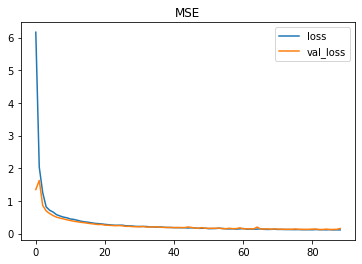

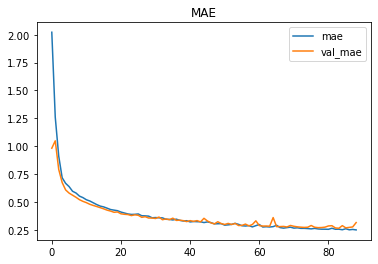

In [75]:
# Define model
inputs = keras.Input(shape=(X_train.shape[1],))
x = layers.Dense(UNITS, activation=ACTIVATION)(inputs)
x = layers.Dense(UNITS, activation=ACTIVATION)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(
    optimizer=OPTIMIZER,
    loss='mse',
    metrics=['mae']
)


# Fit model (and save training history)
history = model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    verbose=0
)


# Convert the training history to a dataframe
history_frame = pd.DataFrame(history.history)


# Plot training history
history_frame.loc[0:, ['loss', 'val_loss']].plot(title='MSE')
history_frame.loc[0:, ['mae', 'val_mae']].plot(title='MAE')


print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation MAE: {:0.4f}")\
      .format(history_frame['val_loss'].min(), 
              history_frame['val_mae'].min()))